In [140]:
import numpy as np
import matplotlib.pyplot as plt
from vq import compression_surrogate_curve, default_cluster_range
from plot_vq import plot_compression_curve, plot_absolute_compression_curve, plot_rd_curve 

In [141]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 1.0, 'Absolute compression curve for standard normal (0,1) multivariate data')

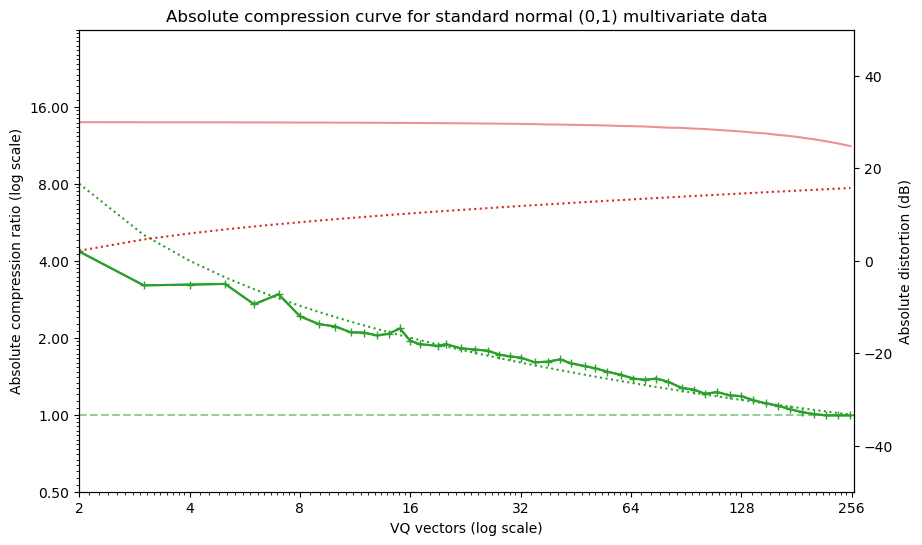

In [311]:

fig, ax = plt.subplots(figsize=(10, 6))

test_m = np.random.normal(0,1,(500,nd))
k_r = default_cluster_range
z_curve, z_surrogate, d_curve = compression_surrogate_curve(test_m, k_r, whiten="standard")    
plot_absolute_compression_curve(ax, k_r, z_curve, d_curve, n_dim=nd)
ax.set_title("Absolute compression curve for standard normal (0,1) multivariate data")


In [312]:

test_m = np.random.normal(0,1,(1500,1))
k_r = default_cluster_range
z_curve, z_surrogate, d_curve = compression_surrogate_curve(test_m, k_r, whiten="standard")


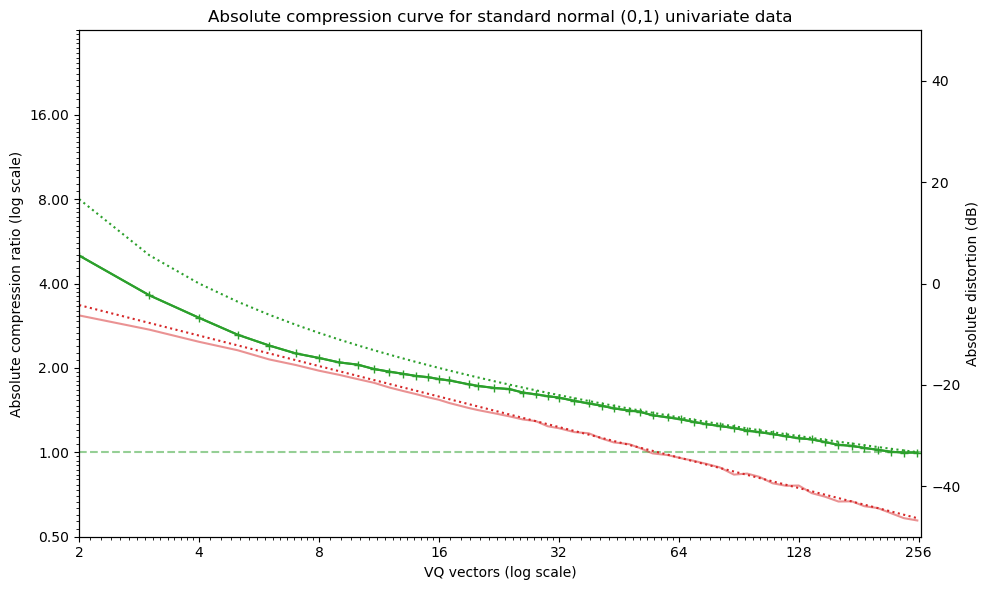

In [313]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_absolute_compression_curve(ax, k_r, z_curve, d_curve)
ax.set_title("Absolute compression curve for standard normal (0,1) univariate data")
plt.tight_layout()
plt.savefig("imgs/abs_normal_compression_curve.png", dpi=300)

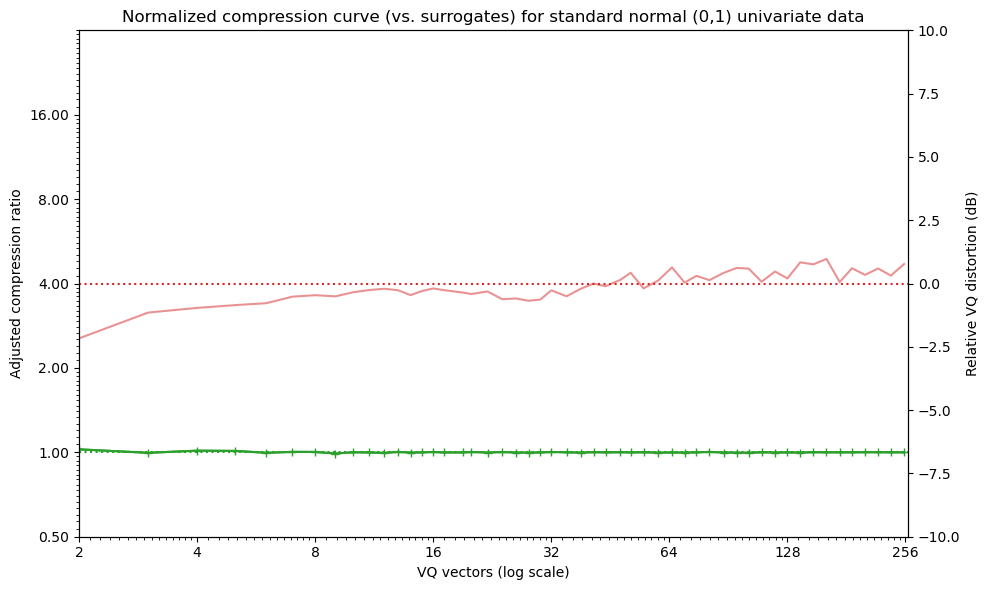

In [307]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_compression_curve(ax, k_r, z_curve, z_surrogate, d_curve)
ax.set_title("Normalized compression curve (vs. surrogates) for standard normal (0,1) univariate data")
plt.tight_layout()
plt.savefig("imgs/std_normal_compression_curve.png", dpi=300)

In [314]:

xs = np.linspace(0,40,1000)
test_m = (np.sin(xs))[:,None]
z_curve, z_surrogate, d_curve = compression_surrogate_curve(test_m, k_r, whiten="sphere")


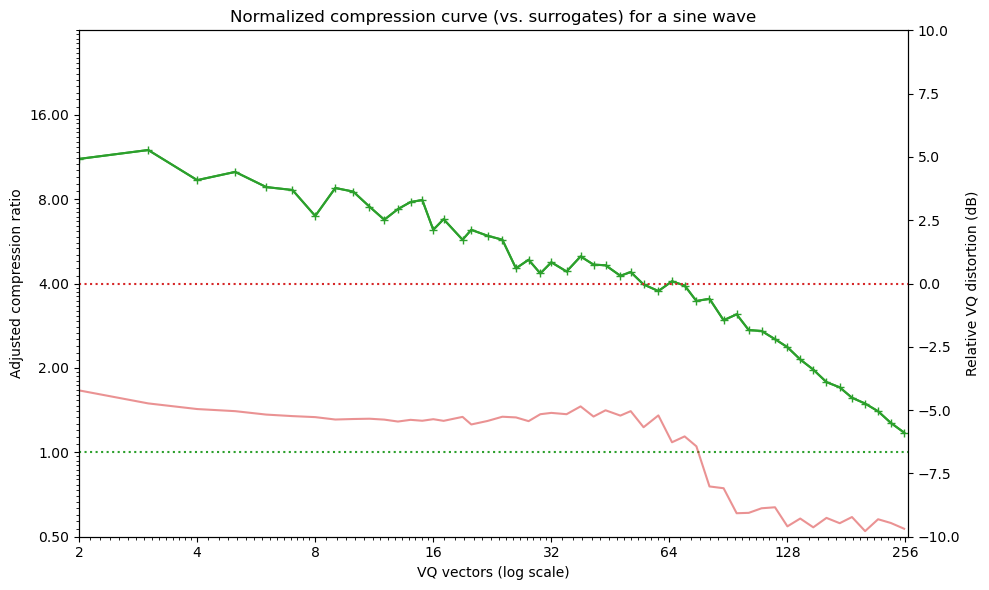

In [315]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_compression_curve(ax, k_r, z_curve, z_surrogate, d_curve)
ax.set_title("Normalized compression curve (vs. surrogates) for a sine wave")
plt.tight_layout()
plt.savefig("imgs/sine_compression_curve.png", dpi=300)

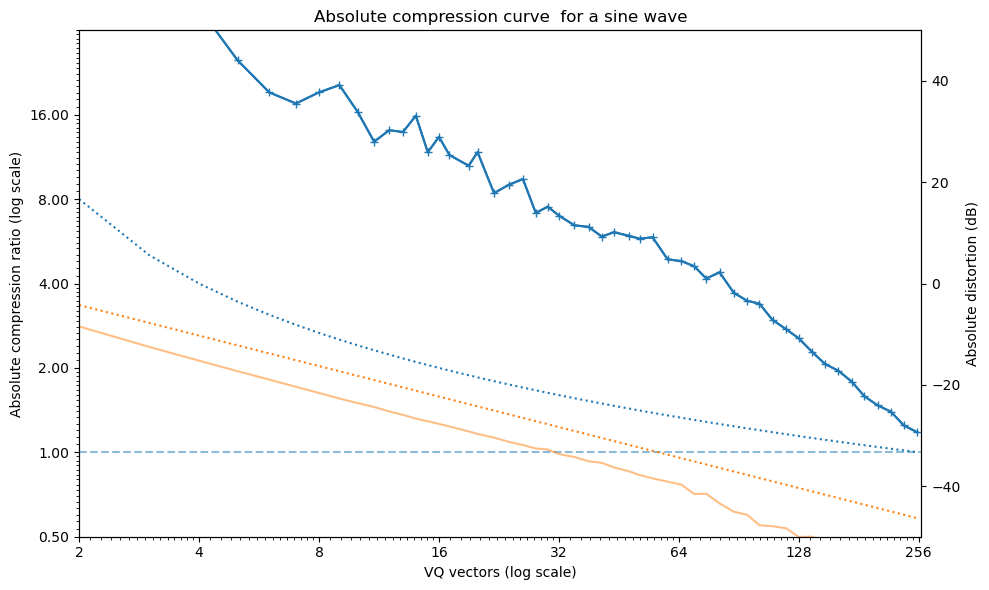

In [310]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_absolute_compression_curve(ax, k_r, z_curve, d_curve)
ax.set_title("Absolute compression curve  for a sine wave")
plt.tight_layout()
plt.savefig("imgs/abs_sine_compression_curve.png", dpi=300)

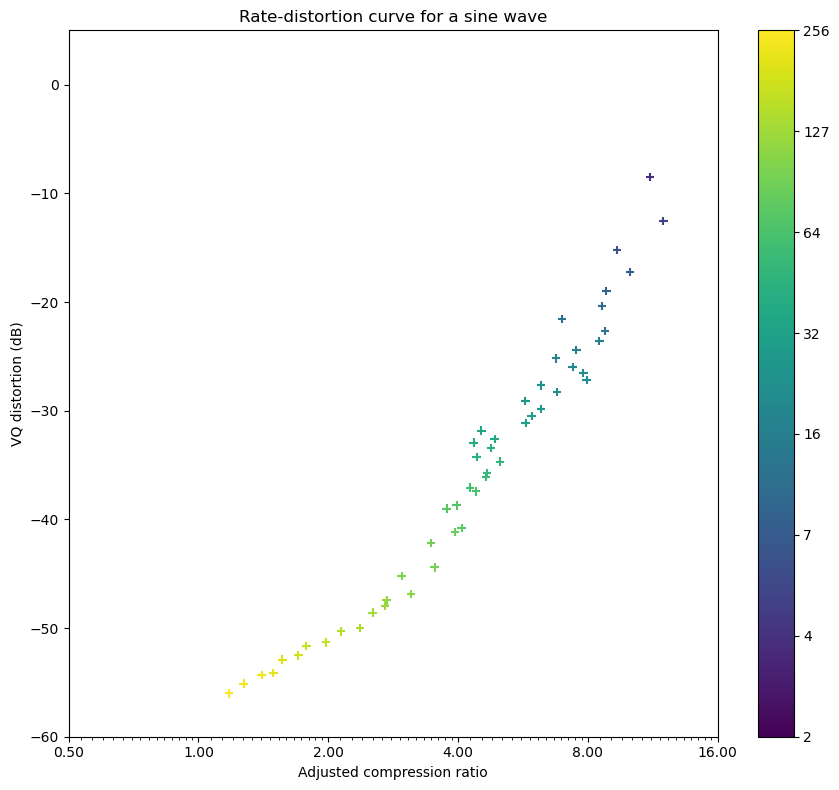

In [316]:
fig, ax = plt.subplots(figsize=(9, 8))
plot_rd_curve(ax, k_r, z_curve, z_surrogate, d_curve)
ax.set_title("Rate-distortion curve for a sine wave")
plt.tight_layout()
plt.savefig("imgs/sine_rd_curve.png", dpi=300)

In [317]:
import scipy.io.wavfile
_, ex7 = scipy.io.wavfile.read("ex7.wav")
ex7_decimated = ex7[:45000:4, None]/32767.0
print(ex7_decimated.shape)

(11250, 1)


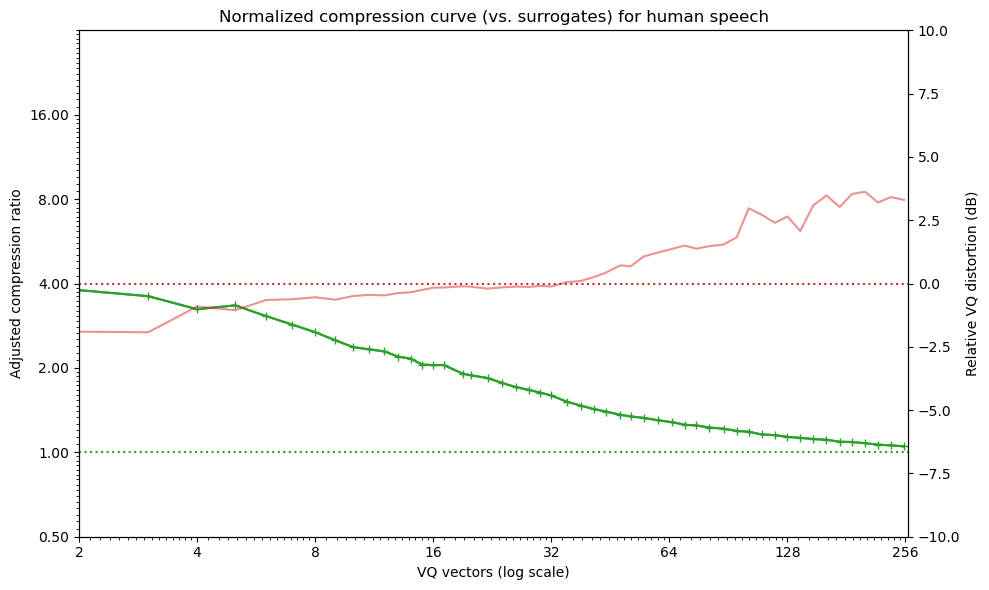

In [318]:
fig, ax = plt.subplots(figsize=(10, 6))
z_curve, z_surrogate, d_curve = compression_surrogate_curve(ex7_decimated, k_r)
plot_compression_curve(ax, k_r, z_curve, z_surrogate, d_curve)
ax.set_title("Normalized compression curve (vs. surrogates) for human speech")
plt.tight_layout()
plt.savefig("imgs/speech_compression_curve.png", dpi=300)

In [151]:
from vq import gaussian_pyramid
ex7_pyramid = gaussian_pyramid(ex7[:,None], 2)

C:\Users\John\AppData\Local\Temp\ipykernel_10084\2110987935.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', len(ex7_pyramid))


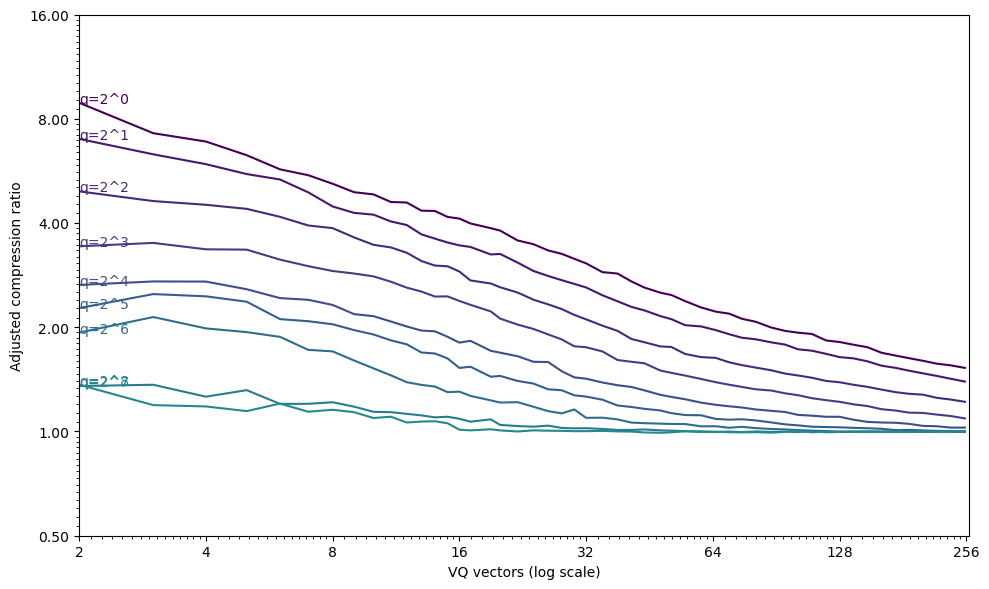

In [155]:
from plot_vq import set_relative_compression_curve_axes, simple_compression_curve
fig, ax = plt.subplots(figsize=(10, 6))

viridis = plt.cm.get_cmap('viridis', len(ex7_pyramid))

for i, level in enumerate(ex7_pyramid):    
    if len(level)>256:
        
        subsample = int(np.ceil(np.log2(len(level)) / 2))
        if len(level)/subsample<256:
            subsample = 1
        z_curve, z_surrogate, d_curve = compression_surrogate_curve(level, k_r, subsample=subsample)        
        simple_compression_curve(ax, k_r, z_curve, z_surrogate, c=viridis(i))
        ax.text(2, z_curve[0]/z_surrogate[0], "q=2^%d" % i, color=viridis(i))

set_relative_compression_curve_axes(ax)

plt.tight_layout()
plt.savefig("imgs/speech_pyramid_compression_curve.png", dpi=300)

In [ ]:
"""
Data extract from https://physionet.org/content/cebsdb/1.0.0/
García-González, M.A.; Argelagós-Palau, A.; Fernández-Chimeno, M.; Ramos-Castro, J., “A comparison of heartbeat detectors for the seismocardiogram,” Computing in Cardiology Conference (CinC), 2013
in the Physionet database
Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.
"""



dict_keys(['record_name', 'n_sig', 'fs', 'counter_freq', 'base_counter', 'sig_len', 'base_time', 'base_date', 'comments', 'sig_name', 'p_signal', 'd_signal', 'e_p_signal', 'e_d_signal', 'file_name', 'fmt', 'samps_per_frame', 'skew', 'byte_offset', 'adc_gain', 'baseline', 'units', 'adc_res', 'adc_zero', 'init_value', 'checksum', 'block_size'])


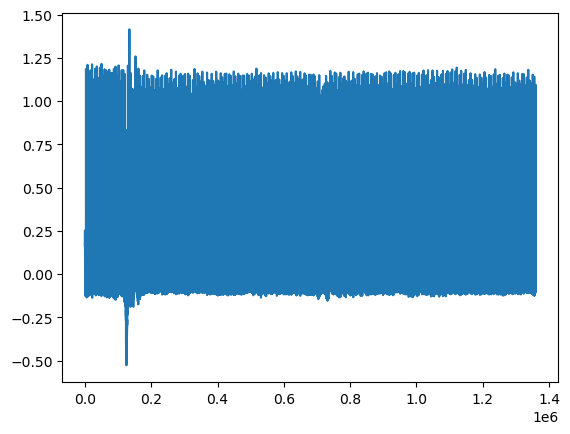

In [172]:
import wfdb
record = wfdb.rdrecord("/temp/ecg-cardiograms/b001")
print(record.__dict__.keys())
# convert to numpy array
ecg_resp = record.p_signal[:,:]
# column names
column_names = record.sig_name

C:\Users\John\AppData\Local\Temp\ipykernel_10084\3723374305.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 4)


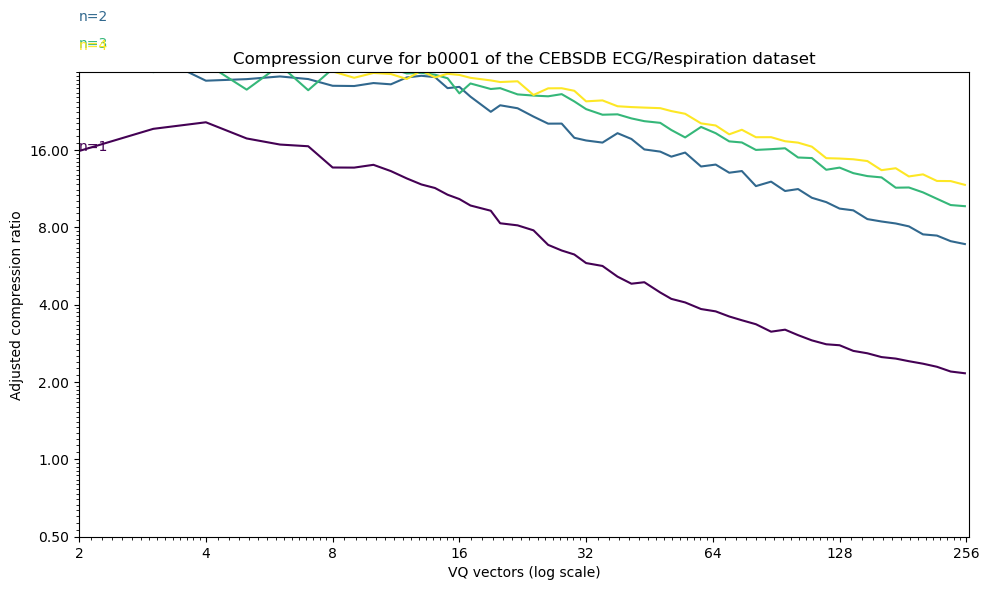

In [303]:
fig, ax = plt.subplots(figsize=(10, 6))
cmap = plt.cm.get_cmap('viridis', 4)
for i in range(4):
    z_curve, z_surrogate, d_curve = compression_surrogate_curve(ecg_resp[:10000,0:4], k_r, pca=i+1)
    simple_compression_curve(ax, k_r, z_curve, z_surrogate, c=cmap(i))
    ax.text(2, z_curve[0]/z_surrogate[0], "n=%d" % (i+1), color=cmap(i))

set_relative_compression_curve_axes(ax)
ax.set_title("Compression curve for b0001 of the CEBSDB ECG/Respiration dataset")
plt.tight_layout()
plt.savefig("imgs/ecg_resp_compression_curve.png", dpi=300)